In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --no-cache-dir --force-reinstall "numpy<2"


     ---------------------------------------- 15.8/15.8 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [2]:
pip install --upgrade numexpr bottleneck


     -------------------------------------- 145.0/145.0 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 111.6/111.6 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.8.3
    Uninstalling numexpr-2.8.3:
      Successfully uninstalled numexpr-2.8.3
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5
Note: you may need to restart the kernel to use updated packages.


In [4]:

# load dataset
import pandas as pd
# Load dataset
data = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\AIML\DATASET\seattle-weather.csv")
data


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [7]:
# Count the occurrences of each weather category in the 'weather' column
data["weather"].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

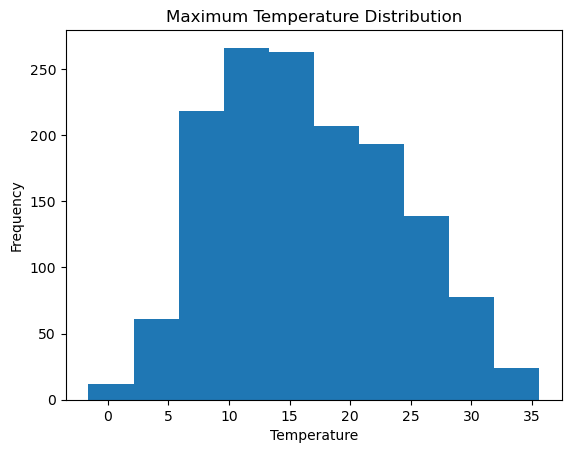

In [8]:
import matplotlib.pyplot as plt
plt.hist(data['temp_max'])
plt.title('Maximum Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

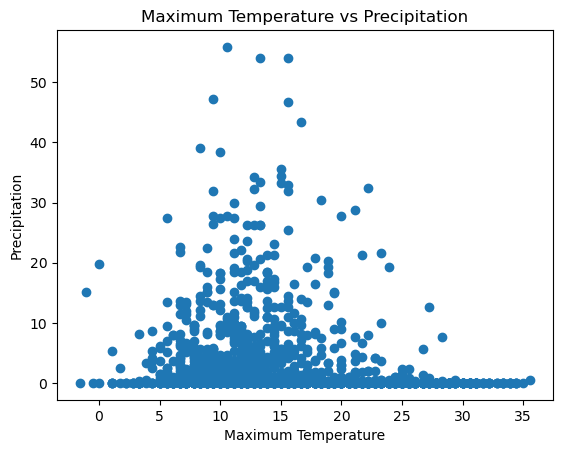

In [9]:
plt.scatter(data['temp_max'], data['precipitation'])
plt.title('Maximum Temperature vs Precipitation')
plt.xlabel('Maximum Temperature')
plt.ylabel('Precipitation')
plt.show()

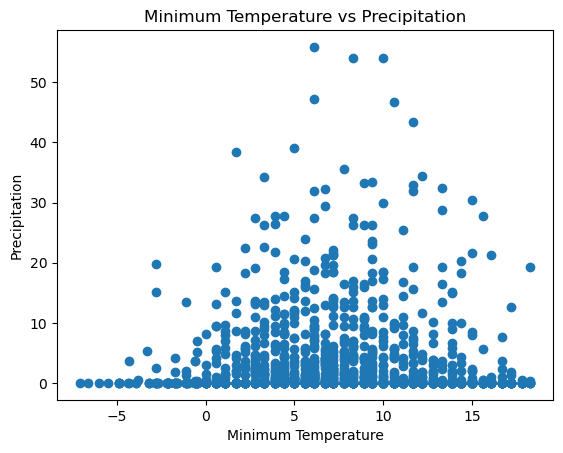

In [10]:
plt.scatter(data['temp_min'], data['precipitation'])
plt.title('Minimum Temperature vs Precipitation')
plt.xlabel('Minimum Temperature')
plt.ylabel('Precipitation')
plt.show()

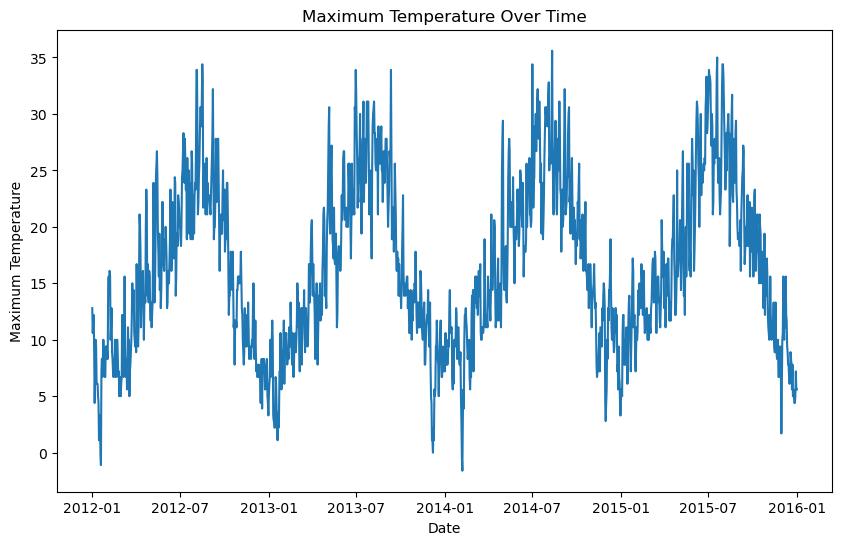

In [11]:
data['date'] = pd.to_datetime(data['date'])
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['temp_max'])
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')

plt.show()

In [12]:
# Check the data type of the 'date' column
print(data['date'].dtypes)


# Extract year, month, and day features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

datetime64[ns]


In [13]:
# Display information about the DataFrame after modifications
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   year           1461 non-null   int32         
 7   month          1461 non-null   int32         
 8   day            1461 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), object(1)
memory usage: 85.7+ KB


In [14]:
data

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12,30


In [16]:
pip install "numpy<1.25.0"


     ---------------------------------------- 14.9/14.9 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\~.mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['weather_label'] = le.fit_transform(data['weather'])

In [18]:
# Drop the 'weather' column and set 'date' as the index in one line
df = data.drop(columns=['weather', 'date'])
# Display the first few rows of the modified DataFrame
print(df.head())

   precipitation  temp_max  temp_min  wind  year  month  day  weather_label
0            0.0      12.8       5.0   4.7  2012      1    1              0
1           10.9      10.6       2.8   4.5  2012      1    2              2
2            0.8      11.7       7.2   2.3  2012      1    3              2
3           20.3      12.2       5.6   4.7  2012      1    4              2
4            1.3       8.9       2.8   6.1  2012      1    5              2


In [19]:
#to find Mean,Median,Variance,Standard deviation,mode

# Calculate the mean along the rows (axis=1)
mean=df.mean(axis=1)
# Calculate the median along the rows (axis=1)
median=df.median(axis=1)
#Calculate the standard deviation along the rows (axis=1) for numeric columns
std=df.std(axis=1, numeric_only=True)
# Calculate the variance along the rows (axis=1)
var=df.var(axis=1)
# Calculate the mode along the rows (axis=1)
mode = df.mode(axis=1)

# Extract the mode(s) as a pandas Series
mode = mode.iloc[:, 0]

In [20]:
# Create a list containing the Series for mean, median, mode, variance, and standard deviation
df_stat = [mean, median, mode, var, std]

# Create a DataFrame 'df_stat' with the statistical measures as columns and rows as the original DataFrame's rows
df_stat = pd.DataFrame(df_stat, index=['mean', 'median', 'mode', 'var', 'std']).T
df_stat

,mean,median,mode,var,std
0,254.5625,2.85,0.0,504277.199821,710.124778
1,255.7250,3.65,2.0,503607.150714,709.652838
2,255.0000,2.65,0.8,504021.808571,709.944933
3,257.7250,5.15,1.0,502485.996429,708.862467
4,254.8875,3.90,1.0,504079.835536,709.985800
...,...,...,...,...,...
1456,259.2000,6.50,1.7,503389.928571,709.499773
1457,258.3125,3.50,1.3,503912.292679,709.867799
1458,258.4250,4.90,0.0,503857.445000,709.829166
1459,258.6250,4.80,-1.0,503747.685000,709.751847


In [21]:
#Skewness,kurtosis
import pandas as pd
import seaborn as sb
from scipy.stats import skew


skew1 = df.skew(axis=1)

kurt= df.kurt(axis=1)
df_hd = [skew1, kurt]

# Create a DataFrame 'df_hd' with skewness and kurtosis as columns and rows as the original DataFrame's rows
df_hd = pd.DataFrame(df_hd, index=['skew', 'kurt']).T

In [22]:
df_hd

,skew,kurt
0,2.828224,7.999134
1,2.828259,7.999284
2,2.828272,7.999342
3,2.827976,7.998079
4,2.828345,7.999653
...,...,...
1456,2.827642,7.996648
1457,2.827493,7.996010
1458,2.827385,7.995547
1459,2.827330,7.995309


In [23]:
# Concatenate the DataFrames horizontally (along columns) to create 'df_extra'

df_extra = pd.concat([df,df_stat,df_hd], axis=1)

In [24]:
df_extra

,precipitation,temp_max,temp_min,wind,year,month,day,weather_label,mean,median,mode,var,std,skew,kurt
0,0.0,12.8,5.0,4.7,2012,1,1,0,254.5625,2.85,0.0,504277.199821,710.124778,2.828224,7.999134
1,10.9,10.6,2.8,4.5,2012,1,2,2,255.7250,3.65,2.0,503607.150714,709.652838,2.828259,7.999284
2,0.8,11.7,7.2,2.3,2012,1,3,2,255.0000,2.65,0.8,504021.808571,709.944933,2.828272,7.999342
3,20.3,12.2,5.6,4.7,2012,1,4,2,257.7250,5.15,1.0,502485.996429,708.862467,2.827976,7.998079
4,1.3,8.9,2.8,6.1,2012,1,5,2,254.8875,3.90,1.0,504079.835536,709.985800,2.828345,7.999653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2015,12,27,2,259.2000,6.50,1.7,503389.928571,709.499773,2.827642,7.996648
1457,1.5,5.0,1.7,1.3,2015,12,28,2,258.3125,3.50,1.3,503912.292679,709.867799,2.827493,7.996010
1458,0.0,7.2,0.6,2.6,2015,12,29,1,258.4250,4.90,0.0,503857.445000,709.829166,2.827385,7.995547
1459,0.0,5.6,-1.0,3.4,2015,12,30,4,258.6250,4.80,-1.0,503747.685000,709.751847,2.827330,7.995309


In [25]:

# Split the data into features (X) and target variable (y)
x = df_extra.drop(["weather_label"], axis= 1)
y = df_extra["weather_label"]

In [26]:

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test ,y_train ,y_test = train_test_split(x,y, test_size=0.2)

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

def svm(X_train, y_train, X_test, y_test):
    # Standardize the input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the SVM model
    svm_model = SVC(kernel='rbf', random_state=2)  # You can also use 'linear' or 'poly' as kernel
    svm_model.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred = svm_model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # For multiclass classification
    recall = recall_score(y_test, y_pred, average='weighted')  # For multiclass classification

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print(classification_report(y_test, y_pred))

   
    return svm_model, scaler


svm_model, scaler = svm(x_train, y_train, x_test, y_test)


Accuracy: 0.7542662116040956
Precision: 0.7165256795098482
Recall: 0.7542662116040956
              precision    recall  f1-score   support

           0       1.00      0.12      0.21        17
           1       0.00      0.00      0.00        17
           2       0.85      0.80      0.82       132
           3       0.00      0.00      0.00         8
           4       0.68      0.95      0.79       119

    accuracy                           0.75       293
   macro avg       0.51      0.37      0.37       293
weighted avg       0.72      0.75      0.71       293



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classificati

In [28]:
!pip install sklearn_relief

In [30]:
#Relief-f model

In [31]:
# Install the correct package
!pip install skrebate

In [33]:
# Install the correct package
!pip install skrebate

# Import necessary libraries
import numpy as np
import pandas as pd
from skrebate import ReliefF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target variable (y)
data = df_extra.drop(["weather_label"], axis=1)
target = df_extra["weather_label"]
X = data.to_numpy()
y = target.to_numpy()

# Apply ReliefF feature selection
fs = ReliefF(n_neighbors=30)
fs.fit(X, y)

# Select the top 13 features based on their importance scores
top_features_indices = np.argsort(fs.feature_importances_)[-13:]  # Select top 13
X_feat = X[:, top_features_indices]  # Keep only the selected features

# Convert selected features into DataFrame
X_feat_df = pd.DataFrame(X_feat, columns=[data.columns[i] for i in top_features_indices])
y_series = pd.Series(y, name='weather_label')

# Concatenate features and target variable
df = pd.concat([X_feat_df, y_series], axis=1)

# Print the shapes before and after feature selection
print("(No. of tuples, No. of Columns before ReliefF):", X.shape)
print("(No. of tuples, No. of Columns after ReliefF):", X_feat.shape)
print("Shape of the final DataFrame:", df.shape)

# Splitting dataset into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_feat, y, test_size=0.2, random_state=0)

# Performing Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


(No. of tuples, No. of Columns before ReliefF): (1461, 14)
(No. of tuples, No. of Columns after ReliefF): (1461, 13)
Shape of the final DataFrame: (1461, 14)


In [34]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_feat,y,test_size=0.2,random_state=0)

In [35]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#SVM

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

def svm(X_train, y_train, X_test, y_test):
    # Standardize the input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the SVM model
    svm_model = SVC(kernel='linear', random_state=2)  # You can also use 'linear' or 'poly' as kernel
    svm_model.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred = svm_model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # For multiclass classification
    recall = recall_score(y_test, y_pred, average='weighted')  # For multiclass classification

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print(classification_report(y_test, y_pred))

    # Predict for a single data point (example: the 10th element in the test set)
    one_row_data = X_test_scaled[10].reshape(1, -1)
    print(f"Actual Value: {y_test[10]}")
    future_prediction = svm_model.predict(one_row_data)
    print(f"Predicted Value: {future_prediction[0]}")

    return svm_model, scaler


svm_model, scaler = svm(X_train, Y_train, X_test, Y_test)


Accuracy: 0.8668941979522184
Precision: 0.8768962039869034
Recall: 0.8668941979522184
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.94      0.55      0.70        29
           2       0.92      0.86      0.89       123
           3       1.00      0.50      0.67         6
           4       0.83      0.97      0.89       125

    accuracy                           0.87       293
   macro avg       0.87      0.74      0.77       293
weighted avg       0.88      0.87      0.86       293

Actual Value: 4
Predicted Value: 4


In [ ]:
#DECISION TREE CLASSIFIER

In [37]:
from sklearn.tree import DecisionTreeClassifier

def train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test):
    # Standardize the input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the decision tree model
    decision_tree_model = DecisionTreeClassifier(random_state=2)
    decision_tree_model.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred = decision_tree_model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print(classification_report(y_test, y_pred))

    # Predict for a single data point (example: the 10th element in the test set)
    one_row_data = X_test_scaled[10].reshape(1, -1)
    print(f"Actual Value: {y_test[10]}")
    future_prediction = svm_model.predict(one_row_data)
    print(f"Predicted Value: {future_prediction[0]}")

    return decision_tree_model, scaler

# Train and evaluate Decision Tree model
decision_tree_model, scaler = train_and_evaluate_decision_tree(X_train, Y_train, X_test, Y_test)

Accuracy: 0.8361774744027304
Precision: 0.834057167235495
Recall: 0.8361774744027304
              precision    recall  f1-score   support

           0       0.38      0.30      0.33        10
           1       0.55      0.55      0.55        29
           2       0.92      0.93      0.93       123
           3       1.00      0.50      0.67         6
           4       0.84      0.86      0.85       125

    accuracy                           0.84       293
   macro avg       0.74      0.63      0.67       293
weighted avg       0.83      0.84      0.83       293

Actual Value: 4
Predicted Value: 4


In [ ]:
#RANDOM FOREST CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

def train_and_evaluate_random_forest(X_train, y_train, X_test, y_test):
    # Create and train the Random Forest model
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=2)
    random_forest_model.fit(X_train, y_train)

    # Predict on test data
    y_pred = random_forest_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print('Random Forest Model:')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print(classification_report(y_test, y_pred))

    return random_forest_model

# Train and evaluate Random Forest model
random_forest_model = train_and_evaluate_random_forest(X_train, Y_train, X_test, Y_test)

Random Forest Model:
Accuracy: 0.8532423208191127
Precision: 0.8647371348271131
Recall: 0.8532423208191127
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.82      0.31      0.45        29
           2       0.94      0.93      0.93       123
           3       1.00      0.33      0.50         6
           4       0.78      0.98      0.87       125

    accuracy                           0.85       293
   macro avg       0.91      0.57      0.64       293
weighted avg       0.86      0.85      0.83       293



In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

def train_and_evaluate_naive_bayes(X_train, y_train, X_test, y_test):
    # Create and train the Naive Bayes model
    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(X_train, y_train)

    # Predict on test data
    y_pred = naive_bayes_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print('Naive Bayes Model:')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print(classification_report(y_test, y_pred))
   
    return naive_bayes_model

# Train and evaluate Naive Bayes model
naive_bayes_model = train_and_evaluate_naive_bayes(X_train, Y_train, X_test, Y_test)

Naive Bayes Model:
Accuracy: 0.7815699658703071
Precision: 0.824620789770358
Recall: 0.7815699658703071
              precision    recall  f1-score   support

           0       0.41      0.70      0.52        10
           1       0.45      0.45      0.45        29
           2       0.99      0.80      0.89       123
           3       0.29      0.83      0.43         6
           4       0.81      0.84      0.82       125

    accuracy                           0.78       293
   macro avg       0.59      0.73      0.62       293
weighted avg       0.82      0.78      0.80       293



In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

def train_and_evaluate_knn(X_train, y_train, X_test, y_test, n_neighbors=5):
    # Create and train the kNN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)

    # Predict on test data
    y_pred = knn_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print('k-Nearest Neighbors Model:')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print(classification_report(y_test, y_pred))
  

    return knn_model

# Train and evaluate kNN model
knn_model = train_and_evaluate_knn(X_train, Y_train, X_test, Y_test, n_neighbors=5)

k-Nearest Neighbors Model:
Accuracy: 0.7167235494880546
Precision: 0.7019563819449185
Recall: 0.7167235494880546
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        10
           1       0.43      0.21      0.28        29
           2       0.77      0.82      0.80       123
           3       1.00      0.17      0.29         6
           4       0.70      0.80      0.75       125

    accuracy                           0.72       293
   macro avg       0.68      0.44      0.48       293
weighted avg       0.70      0.72      0.70       293



C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
pip install tensorflow

  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.


In [42]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

def train_and_evaluate_ann(X_train, y_train, X_test, y_test, num_classes, epochs=10, batch_size=32):
    # Define the ANN model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    # Evaluate the model
    y_pred_probs = model.predict(X_test)
    y_pred = tf.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print('Artificial Neural Network Model:')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print(classification_report(y_test, y_pred))
    

    return model

# Train and evaluate ANN model
ann_model = train_and_evaluate_ann(X_train, Y_train, X_test, Y_test, num_classes=10, epochs=10, batch_size=32)


C:\Users\USER\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3268 - loss: 2.2990
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5753 - loss: 1.3726
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7356 - loss: 0.9364
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7491 - loss: 0.8257
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7825 - loss: 0.7357
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7680 - loss: 0.6940
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 0.6650
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8094 - loss: 0.6098
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.5835 
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.5383
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Artificial Neural Network Model:
Accuracy: 0.7474402730375427
Precision: 0.6956844574900114
Recall: 0.7474402730375427

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classificati

In [ ]:
#DEEP NEURAL NETWORK(DNN)

In [43]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

def train_and_evaluate_dnn(X_train, y_train, X_test, y_test, num_classes, epochs=10, batch_size=32):
    # Define the DNN model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    # Evaluate the model
    y_pred_probs = model.predict(X_test)
    y_pred = tf.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print('Deep Neural Network Model:')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print(classification_report(y_test, y_pred))

    return model

# Train and evaluate DNN model
dnn_model = train_and_evaluate_dnn(X_train, Y_train, X_test, Y_test, num_classes=10, epochs=10, batch_size=32)

Epoch 1/10


C:\Users\USER\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3243 - loss: 2.0024
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5452 - loss: 1.2596
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6107 - loss: 1.0617
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6667 - loss: 0.9737
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 0.9216
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - loss: 0.9317
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7166 - loss: 0.8741
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.7945
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7605 - loss: 0.7424
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7599 - loss: 0.7035
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Deep Neural Network Model:
Accuracy: 0.7235494880546075
Precision: 0.6160412760077518
Recall: 0.7235494880546075
              prec

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classificati